<a href="https://colab.research.google.com/github/Ronaksharma57/Upgrade/blob/main/EDA_Assg_NYC_Taxi_Starter_RONAK_SHARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2


# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload


df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["date"] = df["tpep_pickup_datetime"].dt.date
df["hour"] = df["tpep_pickup_datetime"].dt.hour

sampled_data = pd.DataFrame()

for date in df["date"].unique():
    date_data = df[df["date"] == date]

    for hour in range(24):
        hour_data = date_data[date_data["hour"] == hour]

        if not hour_data.empty:
            sample = hour_data.sample(frac=0.05, random_state=42)  # 5% sampling
            sampled_data = pd.concat([sampled_data, sample])  # Append to result DataFrame

# Reset index after sampling
sampled_data.reset_index(drop=True, inplace=True)

# Display sampled data
print(sampled_data.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0       

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

# Change directory to the folder containing the Parquet files
data_folder = "/content/drive/MyDrive/Datasets and Dictionary (1)/trip_records"
os.chdir(data_folder)

# Create a list of all the twelve files to read
file_list = sorted([f for f in os.listdir() if f.endswith(".parquet")])  # Ensuring only Parquet files

# Initialize an empty dataframe for the full-year data
yearly_data = pd.DataFrame()

# Iterate through each monthly file
for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Processing file: {file_name}")  # Debugging statement

        # Read the Parquet file
        df = pd.read_parquet(file_path)

        # Convert pickup datetime to pandas datetime format
        df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

        # Extract date and hour
        df["date"] = df["tpep_pickup_datetime"].dt.date
        df["hour"] = df["tpep_pickup_datetime"].dt.hour

        # DataFrame to store sampled data for the current month
        sampled_data = pd.DataFrame()

        # Iterate through each unique date in the month
        for date in df["date"].unique():
            date_data = df[df["date"] == date]  # Filter data for that date

            # Iterate through each hour (0-23) within the date
            for hour in range(24):
                hour_data = date_data[date_data["hour"] == hour]  # Filter data for that hour

                if not hour_data.empty:  # Avoid sampling from empty data
                    sample = hour_data.sample(frac=0.05, random_state=42)  # Take 5% sample
                    sampled_data = pd.concat([sampled_data, sample])  # Append sampled data

        # Append the month's sampled data to the yearly dataframe
        yearly_data = pd.concat([yearly_data, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index after processing all files
yearly_data.reset_index(drop=True, inplace=True)

# Save final yearly sampled data
output_path = os.path.join(data_folder, "sampled_nyc_taxi_2023.parquet")
yearly_data.to_parquet(output_path, index=False)

print(f"Sampling complete! Data saved at: {output_path}")


Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet
✅ Sampling complete! Data saved at: /content/drive/MyDrive/Datasets and Dictionary (1)/trip_records/sampled_nyc_taxi_2023.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')


data_folder = "/content/drive/MyDrive/Datasets and Dictionary (1)/trip_records"

yearly_data_path = os.path.join(data_folder, "sampled_nyc_taxi_2023.parquet")
yearly_data = pd.read_parquet(yearly_data_path)

target_size = 300000
if len(yearly_data) > target_size:
    yearly_data = yearly_data.sample(n=target_size, random_state=42)
parquet_output = os.path.join(data_folder, "final_nyc_taxi_2023.parquet")
csv_output = os.path.join(data_folder, "final_nyc_taxi_2023.csv")

yearly_data.to_parquet(parquet_output, index=False)
print(f"Parquet file saved: {parquet_output}")

yearly_data.to_csv(csv_output, index=False)
print(f"CSV file saved: {csv_output}")


Parquet file saved: /content/drive/MyDrive/Datasets and Dictionary (1)/trip_records/final_nyc_taxi_2023.parquet
CSV file saved: /content/drive/MyDrive/Datasets and Dictionary (1)/trip_records/final_nyc_taxi_2023.csv


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
data_folder = "/content/drive/MyDrive/Datasets and Dictionary (1)/trip_records"

# Load the Parquet file
parquet_file = os.path.join(data_folder, "final_nyc_taxi_2023.parquet")
df_parquet = pd.read_parquet(parquet_file)



In [ ]:
# df.head()
df_parquet.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        5.50          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       10.00          6.55   
3             1  ...      0.5        5.46          0.00   
4             1  ...      0.5        3.58          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         27.50                   2.5          NaN   
1                    1.0         14.00                   2.5          0.0   
2                    1.0         89.30                   0.0          NaN   
3                    1.0         32.76                   2.5          NaN   
4                    1.0         21.48                   2.5          NaN   

         date  hour Airport_fee  
0  2023-04-21     1        0.00  
1  2023-01-10    14         NaN  
2  2023-02-04    15        1.25  
3  2023-03-24    12        0.00  
4  2023-09-05    17        0.00  

[5 rows x 22 columns]

In [ ]:
# df.info()
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289777 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289777 non-null  float64       
 6   store_and_fwd_flag     289777 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed



drop_columns = [
    "VendorID",
    "store_and_fwd_flag",
    "RateCodeID",
    "Airport_fee"
]

df.drop(columns=[col for col in drop_columns if col in df.columns], inplace=True)

print("Columns after dropping:", df.columns.tolist())

# Save the cleaned dataset
cleaned_parquet_file = os.path.join(data_folder, "cleaned_nyc_taxi_2023.parquet")
cleaned_csv_file = os.path.join(data_folder, "cleaned_nyc_taxi_2023.csv")

df.to_parquet(cleaned_parquet_file, index=False)
df.to_csv(cleaned_csv_file, index=False)

print(f"Cleaned Parquet file saved at: {cleaned_parquet_file}")
print(f"Cleaned CSV file saved at: {cleaned_csv_file}")




Columns after dropping: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'date', 'hour']
Cleaned Parquet file saved at: /content/drive/MyDrive/Datasets and Dictionary (1)/trip_records/cleaned_nyc_taxi_2023.parquet
Cleaned CSV file saved at: /content/drive/MyDrive/Datasets and Dictionary (1)/trip_records/cleaned_nyc_taxi_2023.csv


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
duplicate_columns = [col for col in df.columns if "airport_fee" in col.lower()]
print("Detected Airport Fee columns:", duplicate_columns)

if len(duplicate_columns) == 2:
    df["Airport_fee"] = df[duplicate_columns].sum(axis=1, skipna=True)

    df.drop(columns=duplicate_columns, inplace=True)


# Save the updated dataset
final_parquet_file = os.path.join(data_folder, "final_nyc_taxi_2023.parquet")
final_csv_file = os.path.join(data_folder, "final_nyc_taxi_2023.csv")

df.to_parquet(final_parquet_file, index=False)
df.to_csv(final_csv_file, index=False)

print(f"Final Parquet file saved at: {final_parquet_file}")
print(f"Final CSV file saved at: {final_csv_file}")



Detected Airport Fee columns: []
Final Parquet file saved at: /content/drive/MyDrive/Datasets and Dictionary (1)/trip_records/final_nyc_taxi_2023.parquet
Final CSV file saved at: /content/drive/MyDrive/Datasets and Dictionary (1)/trip_records/final_nyc_taxi_2023.csv


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

df = pd.read_parquet(final_parquet_file)
negative_fares = df[df["fare_amount"] < 0]

# Display results
print(f"Found {len(negative_fares)} trips with negative fare amounts.")

df["fare_amount"].describe()



Found 0 trips with negative fare amounts.
Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour]
Index: []


count    2.817156e+06
mean     2.111947e+01
std      1.424730e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.420000e+01
75%      2.400000e+01
max      1.875030e+05
Name: fare_amount, dtype: float64

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

# Filter trips with zero fare amounts
zero_fare_trips = df[df["fare_amount"] == 0]

# Count of zero fare trips by RatecodeID
ratecode_zero_fare_counts = zero_fare_trips["RatecodeID"].value_counts()

# Display results
print("Zero Fare Trips by RatecodeID:")
print(ratecode_zero_fare_counts)


Zero Fare Trips by RatecodeID:
RatecodeID
1.0     479
5.0     247
2.0      99
99.0     61
4.0      15
3.0      12
Name: count, dtype: int64


In [ ]:
# Find which columns have negative values

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"])

# Find columns where any value is negative
negative_values = (numeric_cols < 0).any()

# Display only columns that have negative values
negative_cols = negative_values[negative_values].index.tolist()

if negative_cols:
    print(f"Columns with negative values: {negative_cols}")

    # Show count of negative values in each column
    for col in negative_cols:
        neg_count = (df[col] < 0).sum()
        print(f"Column '{col}' has {neg_count} negative values.")

        # Display some sample rows with negative values
        print(df[df[col] < 0].head())
else:
    print("No columns have negative values.")


Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']
Column 'mta_tax' has 123 negative values.
       tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6384    2023-09-01 05:59:31   2023-09-01 06:41:39              1.0   
13517   2023-09-01 09:58:09   2023-09-01 10:22:31              1.0   
26432   2023-09-01 12:02:05   2023-09-01 12:06:47              2.0   
69107   2023-09-01 20:18:24   2023-09-01 20:39:12              4.0   
137499  2023-09-02 18:29:48   2023-09-02 18:30:13              3.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
6384            17.40         2.0           100           132             2   
13517           10.60         1.0           101           132             2   
26432            0.00         1.0           132           132             2   
69107            3.49         1.0           261           100             2   
137499           0.00         2.0  

In [ ]:
# fix these negative values

columns_to_fix = ["mta_tax", "improvement_surcharge", "total_amount", "congestion_surcharge"]

df[columns_to_fix] = df[columns_to_fix].abs()

# Verify if there are still negative values
negative_values_check = (df[columns_to_fix] < 0).sum()
print("Negative values remaining after fix:\n", negative_values_check)


Negative values remaining after fix:
 mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum() / len(df)
print(missing_values.sort_values(ascending=False))



passenger_count          0.049615
RatecodeID               0.049615
congestion_surcharge     0.049615
tpep_pickup_datetime     0.000000
mta_tax                  0.000000
date                     0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
extra                    0.000000
tpep_dropoff_datetime    0.000000
fare_amount              0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)



        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2677383  2023-09-01 00:40:49   2023-09-01 00:46:57              NaN   
2677384  2023-09-01 00:11:15   2023-09-01 00:51:28              NaN   
2677385  2023-09-01 00:02:50   2023-09-01 00:20:12              NaN   
2677386  2023-09-01 00:09:54   2023-09-01 00:20:11              NaN   
2677387  2023-09-01 00:15:58   2023-09-01 00:32:10              NaN   
...                      ...                   ...              ...   
2817151  2023-09-30 23:31:12   2023-09-30 23:48:29              NaN   
2817152  2023-09-30 23:42:18   2023-09-30 23:47:45              NaN   
2817153  2023-09-30 23:03:35   2023-09-30 23:14:50              NaN   
2817154  2023-09-30 23:57:05   2023-10-01 00:17:36              NaN   
2817155  2023-09-30 23:25:47   2023-09-30 23:55:28              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
2677383           1.20         NaN           249           164     

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isnull().sum()
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
print(df['RatecodeID'].isnull().sum())




0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isnull().sum()
print(df['congestion_surcharge'].value_counts())
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace=True)
print(df['congestion_surcharge'].isnull().sum())





congestion_surcharge
2.50    2599162
0.00     217993
0.75          1
Name: count, dtype: int64
0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

print(df.isnull().sum())




tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

passenger_count - Outliers: 641797
trip_distance - Outliers: 378988
RatecodeID - Outliers: 161445
PULocationID - Outliers: 0
DOLocationID - Outliers: 0
payment_type - Outliers: 623642
fare_amount - Outliers: 272741
extra - Outliers: 52513
mta_tax - Outliers: 30150
tip_amount - Outliers: 202857
tolls_amount - Outliers: 240736
improvement_surcharge - Outliers: 2600
total_amount - Outliers: 325688
congestion_surcharge - Outliers: 217994
hour - Outliers: 0


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

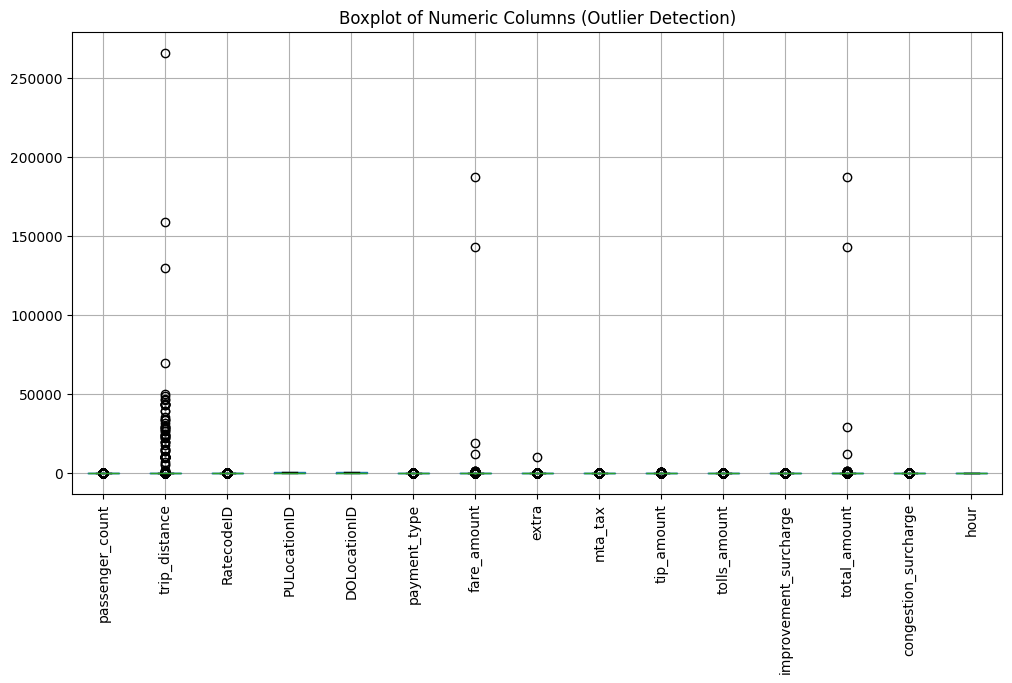

Outliers in fare_amount:
        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5        2023-09-01 00:05:20   2023-09-01 00:46:57              3.0   
10       2023-09-01 00:30:18   2023-09-01 00:58:36              1.0   
15       2023-09-01 00:04:28   2023-09-01 00:49:20              1.0   
33       2023-09-01 00:50:49   2023-09-01 00:51:15              2.0   
43       2023-09-01 00:06:08   2023-09-01 00:50:24              3.0   
...                      ...                   ...              ...   
2817030  2023-09-30 23:21:00   2023-09-30 23:46:00              1.0   
2817068  2023-09-30 23:58:00   2023-10-01 00:25:42              1.0   
2817094  2023-09-30 23:34:18   2023-10-01 00:11:33              1.0   
2817136  2023-09-30 23:58:21   2023-10-01 00:27:20              1.0   
2817147  2023-09-30 23:07:24   2023-09-30 23:34:53              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5                12.83         1.0        

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
summary = df.describe()

# Define IQR and outlier boundaries
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check outliers for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
outliers = {col: detect_outliers_iqr(col) for col in numeric_columns}

# Print outliers count for each column
for col, data in outliers.items():
    print(f"{col} - Outliers: {data.shape[0]}")


    plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot(rot=90)  # Rotate x-labels if needed
plt.title("Boxplot of Numeric Columns (Outlier Detection)")
plt.show()

outliers_fare = detect_outliers_iqr("fare_amount")
print("Outliers in fare_amount:")
print(outliers_fare)

Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]
df['fare_amount'] = np.clip(df['fare_amount'], lower_bound, upper_bound)
df['fare_amount'] = np.log1p(df['fare_amount'])  # log(1+x)


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]



In [ ]:
# Continue with outlier handling

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# 3. Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# 4. Remove trips where trip_distance > 250 miles (unrealistic for NYC taxis)
df = df[df['trip_distance'] <= 250]

# 5. Remove rows where payment_type is 0 (not defined in the data dictionary)
df = df[df['payment_type'] != 0]

# 6. Fix any remaining extreme outliers in fare_amount using IQR
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip fare_amount values to be within the normal range
df['fare_amount'] = np.clip(df['fare_amount'], lower_bound, upper_bound)

In [ ]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler
cols_to_standardize = ['trip_distance', 'fare_amount', 'total_amount', 'tolls_amount', 'tip_amount']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

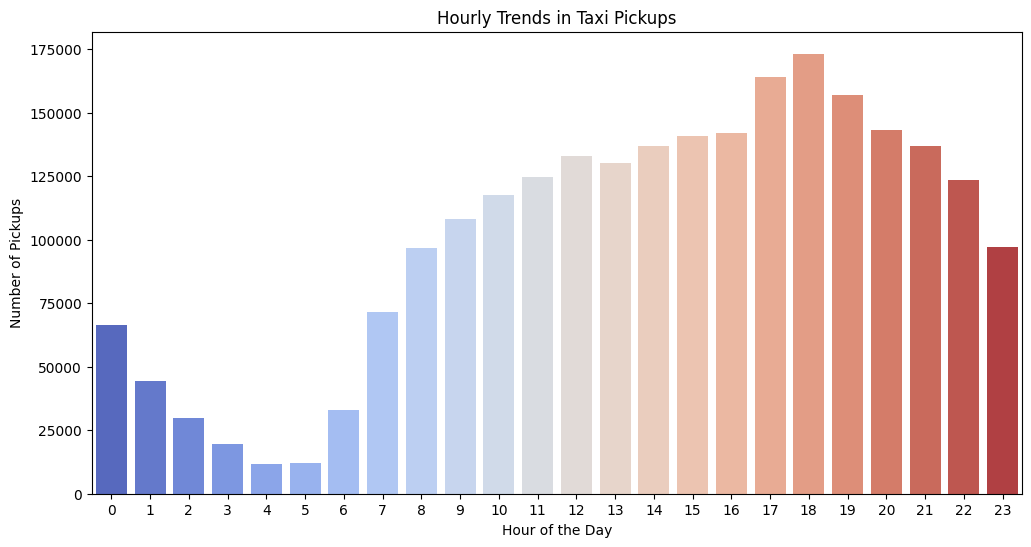

In [ ]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour, day of the week, and month
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Plot hourly trends
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=df, palette='coolwarm')
plt.title("Hourly Trends in Taxi Pickups")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.show()


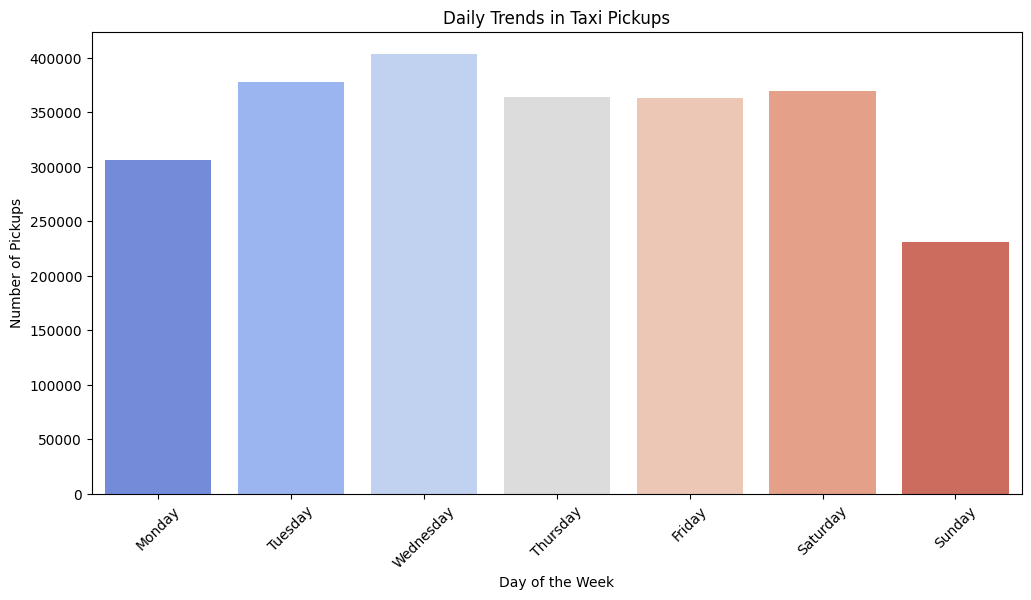

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df['pickup_day'] = df['pickup_day'].map(day_names)

# Plot daily trends
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_day', data=df, order=day_names.values(), palette='coolwarm')
plt.title("Daily Trends in Taxi Pickups")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

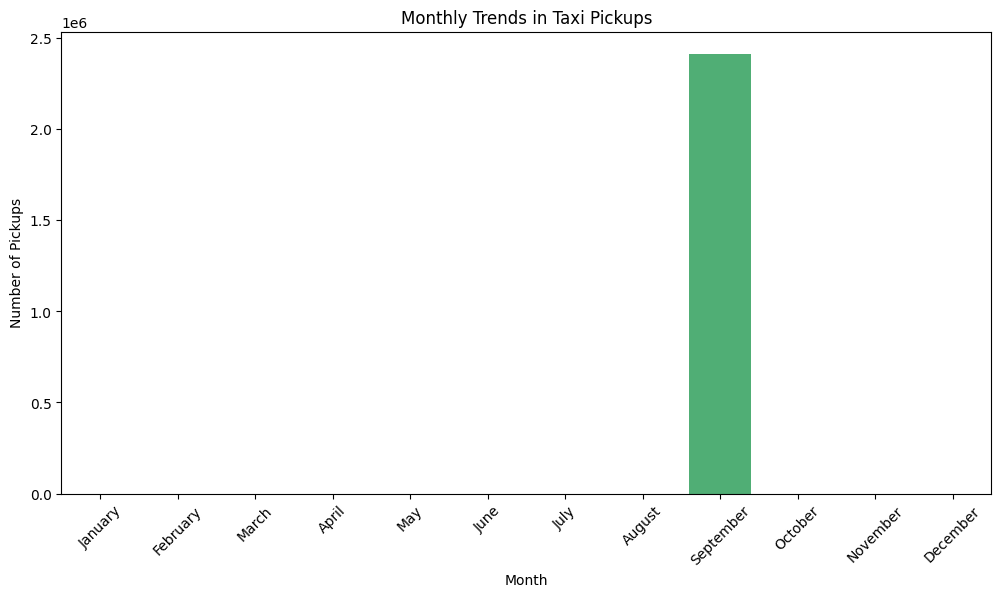

pickup_month
September    2414280
August            16
October            8
Name: count, dtype: int64

In [ ]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
               5: 'May', 6: 'June', 7: 'July', 8: 'August',
               9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df['pickup_month'] = df['pickup_month'].map(month_names)

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_month', data=df, order=month_names.values(), palette='viridis')
plt.title("Monthly Trends in Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()
df['pickup_month'].value_counts()




##### Financial Analysis

*Take* a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

# List of financial columns and trip_distance
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Count negative and zero values
negative_values = (df[columns_to_check] < 0).sum()
zero_values = (df[columns_to_check] == 0).sum()
df = df[(df['fare_amount'] >= 0) &
        (df['total_amount'] >= 0) &
        (df['trip_distance'] >= 0)]
df['tip_amount'] = df['tip_amount'].clip(lower=0)


# Display results
print("Negative Values:\n", negative_values)
print("\nZero Values:\n", zero_values)
print((df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] < 0).sum())




Negative Values:
 fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

Zero Values:
 fare_amount           0
tip_amount       195925
total_amount          0
trip_distance         0
dtype: int64
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

> Add blockquote



**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
df = df[(df['trip_distance'] > 0) &
        (df['fare_amount'] > 0) &
        (df['total_amount'] > 0) &
        (df['tip_amount'] > 0)]
df_zero_distance = df[df['trip_distance'] == 0]
print(df_zero_distance[['fare_amount', 'total_amount', 'PULocationID', 'DOLocationID']].head(10))




Empty DataFrame
Columns: [fare_amount, total_amount, PULocationID, DOLocationID]
Index: []


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

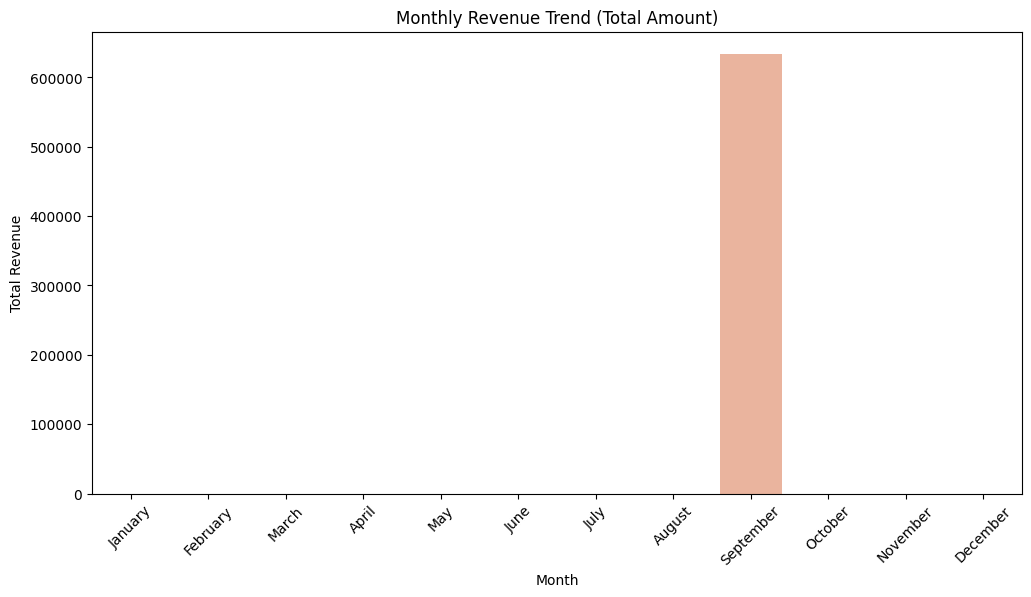

pickup_month   total_amount
0       August       6.704268
2    September  634155.744527
1      October       2.375341

In [ ]:
# Group by pickup month and calculate total revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Sort months in order
monthly_revenue['pickup_month'] = pd.Categorical(
    monthly_revenue['pickup_month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

monthly_revenue = monthly_revenue.sort_values('pickup_month')

# Plot the revenue trend
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_month', y='total_amount', data=monthly_revenue, palette='coolwarm')
plt.title("Monthly Revenue Trend (Total Amount)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Display monthly revenue values
monthly_revenue


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter   total_amount  proportion
0      Q3  634162.448795    0.999996
1      Q4       2.375341    0.000004


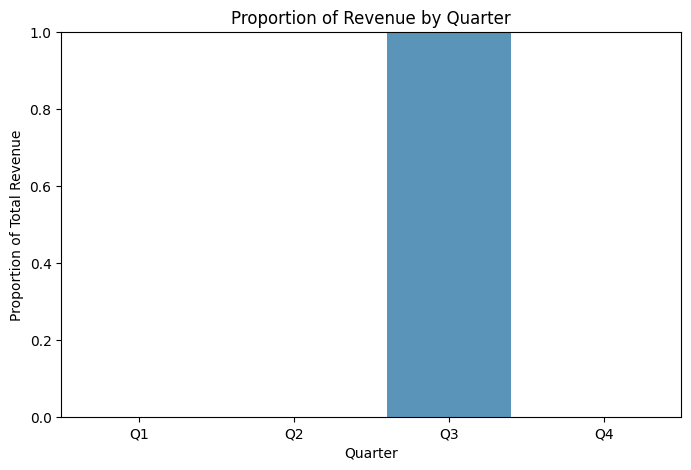

In [ ]:
# Calculate proportion of each quarter
# Create a 'quarter' column from pickup month
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}

df['quarter'] = df['pickup_month'].map(month_to_quarter)

# Group by quarter and calculate total revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion of each quarter
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()

# Sort quarters in correct order
quarterly_revenue['quarter'] = pd.Categorical(quarterly_revenue['quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
quarterly_revenue = quarterly_revenue.sort_values('quarter')

# Display quarterly revenue proportions
print(quarterly_revenue)

# Plot the proportion of revenue by quarter
plt.figure(figsize=(8, 5))
sns.barplot(x='quarter', y='proportion', data=quarterly_revenue, palette='Blues')
plt.title("Proportion of Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Total Revenue")
plt.ylim(0, 1)
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

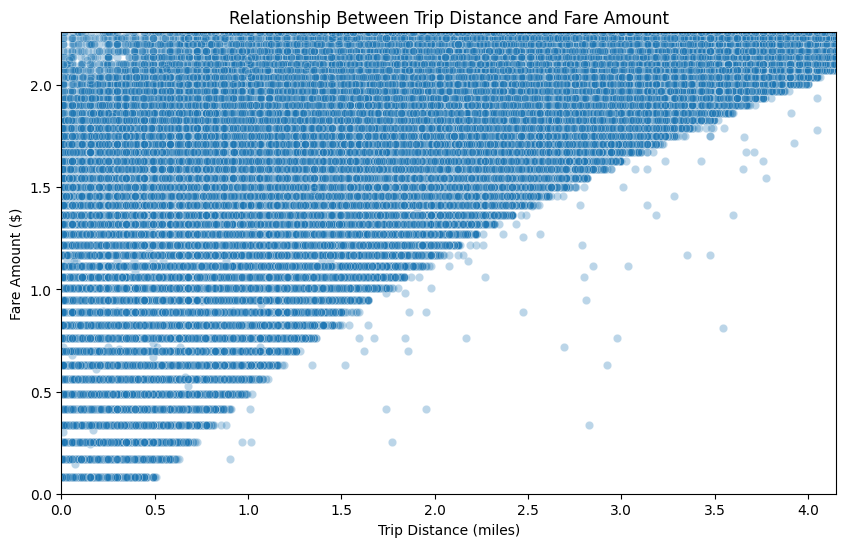

Correlation between trip distance and fare amount: 0.8203


In [ ]:
# Show how trip fare is affected by distance

df_filtered = df[df['trip_distance'] > 0]

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered, alpha=0.3)
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, df_filtered['trip_distance'].quantile(0.99))  # Exclude extreme values for better visualization
plt.ylim(0, df_filtered['fare_amount'].quantile(0.99))
plt.show()

# Calculate correlation between trip_distance and fare_amount
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.4f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

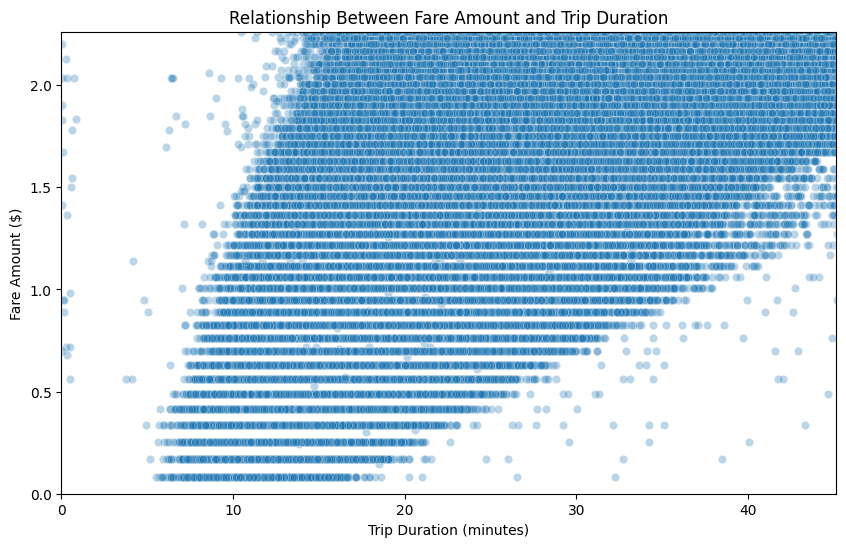

Correlation between fare amount and trip duration: 0.7079


In [ ]:
# Show relationship between fare and trip duration
# Convert pickup and dropoff times to datetime (if not already in datetime format)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
# Filter out extreme trip durations for better visualization
df_filtered = df[(df['trip_duration'] > 0) & (df['trip_duration'] < df['trip_duration'].quantile(0.99))]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_filtered, alpha=0.3)
plt.title("Relationship Between Fare Amount and Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, df_filtered['trip_duration'].quantile(0.99))  # Remove outliers
plt.ylim(0, df_filtered['fare_amount'].quantile(0.99))
plt.show()

# Calculate correlation
correlation_fare_duration = df_filtered['trip_duration'].corr(df_filtered['fare_amount'])
print(f"Correlation between fare amount and trip duration: {correlation_fare_duration:.4f}")



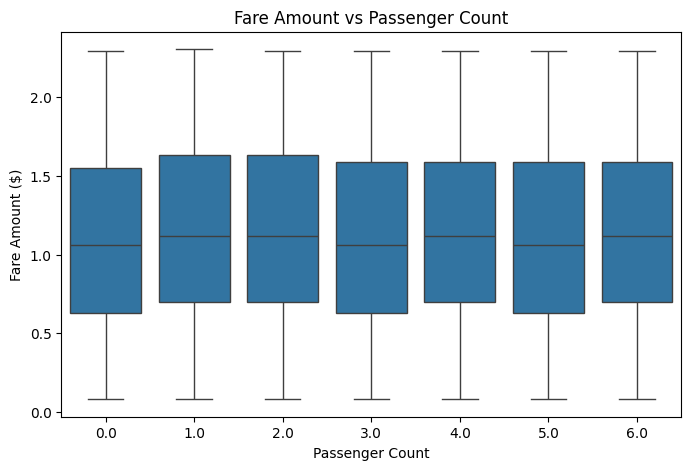

Correlation between fare amount and passenger count: -0.0050


In [ ]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.show()

# Calculate correlation
correlation_fare_passengers = df['fare_amount'].corr(df['passenger_count'])
print(f"Correlation between fare amount and passenger count: {correlation_fare_passengers:.4f}")



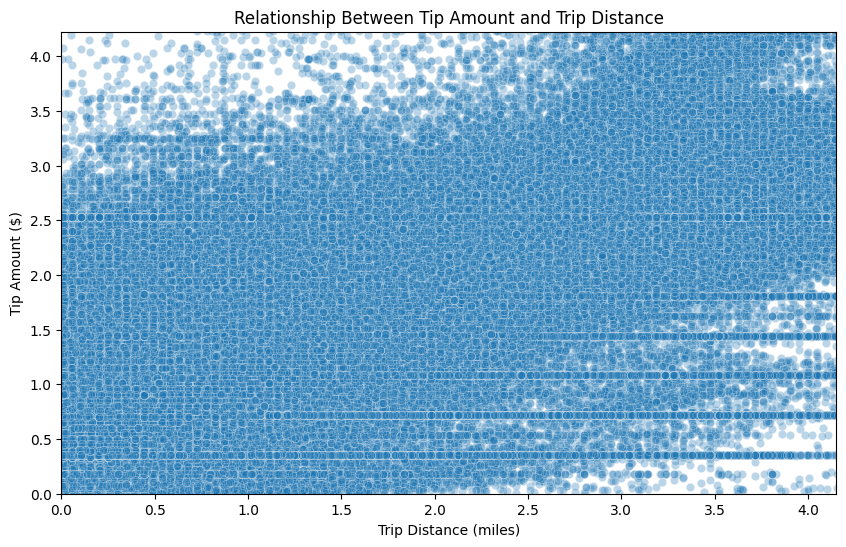

Correlation between tip amount and trip distance: 0.6024


In [ ]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.3)
plt.title("Relationship Between Tip Amount and Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.xlim(0, df['trip_distance'].quantile(0.99))  # Remove outliers
plt.ylim(0, df['tip_amount'].quantile(0.99))
plt.show()

# Calculate correlation
correlation_tip_distance = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between tip amount and trip distance: {correlation_tip_distance:.4f}")



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

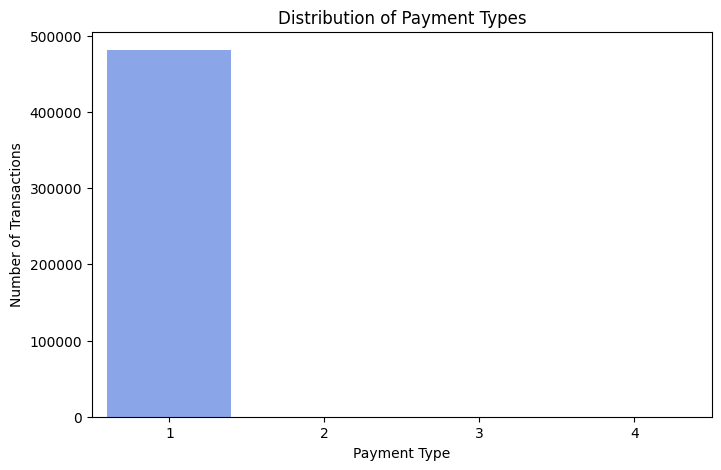

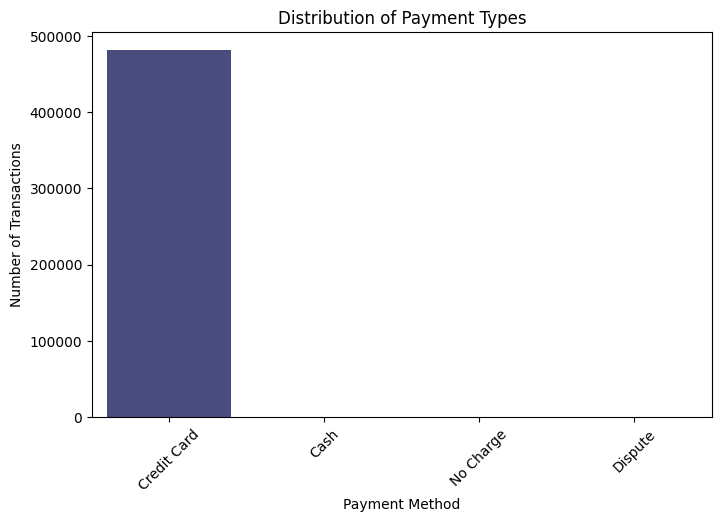

In [ ]:
# Analyse the distribution of different payment types (payment_type).
df['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=df, palette='coolwarm')

plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

df['payment_type'] = df['payment_type'].map(payment_labels)

# Re-visualize with Labels
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=df, palette='viridis', order=payment_labels.values())

plt.title("Distribution of Payment Types")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd

import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/MyDrive/Datasets and Dictionary (1)/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

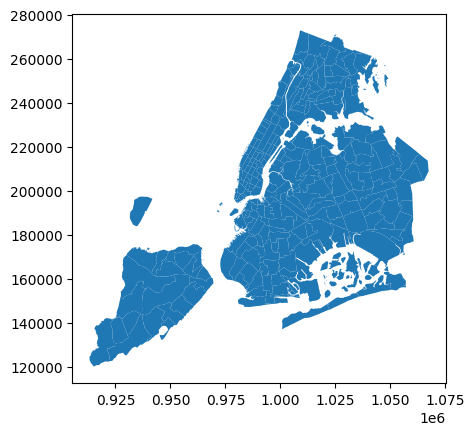

In [ ]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

*Now*, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
# Merge zones data with trip records on PULocationID
df = df.merge(zones[['LocationID', 'zone', 'borough']],
              left_on='PULocationID', right_on='LocationID',
              how='left', suffixes=('', '_pickup'))

# Rename the columns for clarity
df.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

# Drop the extra LocationID column (from zones data)
df.drop(columns=['LocationID'], inplace=True)

# Display first few rows to check merge success
df.head()



tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-09-01 00:01:23   2023-09-01 00:38:05              1.0       3.641471   
1  2023-09-01 00:01:04   2023-09-01 00:18:36              1.0       0.777608   
2  2023-09-01 00:37:44   2023-09-01 00:52:24              2.0       0.200022   
3  2023-09-01 00:03:56   2023-09-01 00:23:09              1.0       2.832851   
4  2023-09-01 00:40:28   2023-09-01 00:53:42              1.0       0.012307   

   RatecodeID  PULocationID  DOLocationID payment_type  fare_amount  extra  \
0         1.0           138           230  Credit Card     2.261993    6.0   
1         1.0           140             7  Credit Card     0.763692    3.5   
2         1.0            45           164  Credit Card     0.335536    1.0   
3         1.0           138           170  Credit Card     1.672309    6.0   
4         1.0           230           140  Credit Card     0.169300    1.0   

   ...  hour  pickup_hour  pickup_day  pickup_month  pickup_month_num  \
0  ...     0            0      Friday     September                 9   
1  ...     0            0      Friday     September                 9   
2  ...     0            0      Friday     September                 9   
3  ...     0            0      Friday     September                 9   
4  ...     0            0      Friday     September                 9   

   pickup_year quarter  trip_duration                pickup_zone  \
0         2023      Q3      36.700000          LaGuardia Airport   
1         2023      Q3      17.533333            Lenox Hill East   
2         2023      Q3      14.666667                  Chinatown   
3         2023      Q3      19.216667          LaGuardia Airport   
4         2023      Q3      13.233333  Times Sq/Theatre District   

  pickup_borough  
0         Queens  
1      Manhattan  
2      Manhattan  
3         Queens  
4      Manhattan  

[5 rows x 27 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
pickup_counts = df.groupby('PULocationID').size().reset_index(name='total_trips')

# Group by DOLocationID (Dropoff Location) and count trips
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='total_trips')

# Display top locations with most pickups
pickup_counts.sort_values(by='total_trips', ascending=False).head(10)



PULocationID  total_trips
106           138        43028
125           161        18743
141           186        18296
54             68        16046
126           162        15438
182           236        15257
183           237        15134
177           230        14235
64             79        12906
133           170        12501

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

<Figure size 1200x800 with 0 Axes>

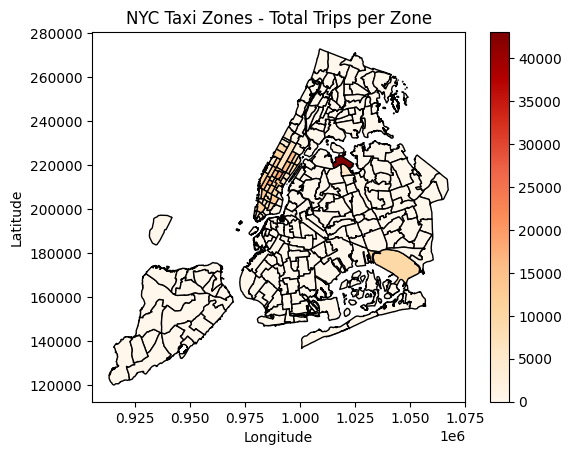

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

# Group trip data by pickup location ID and count trips
trip_counts = df.groupby('PULocationID').size().reset_index(name='total_trips')

# Display the top few rows to verify
trip_counts.head()
# Merge trip counts back to the zones GeoDataFrame on LocationID
zones = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for locations without trips)
zones['total_trips'].fillna(0, inplace=True)

# Display the merged GeoDataFrame
zones.head()

# Plot the map with trip counts
plt.figure(figsize=(12, 8))
zones.plot(column='total_trips', cmap='OrRd', edgecolor='black', legend=True)

plt.title("NYC Taxi Zones - Total Trips per Zone")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

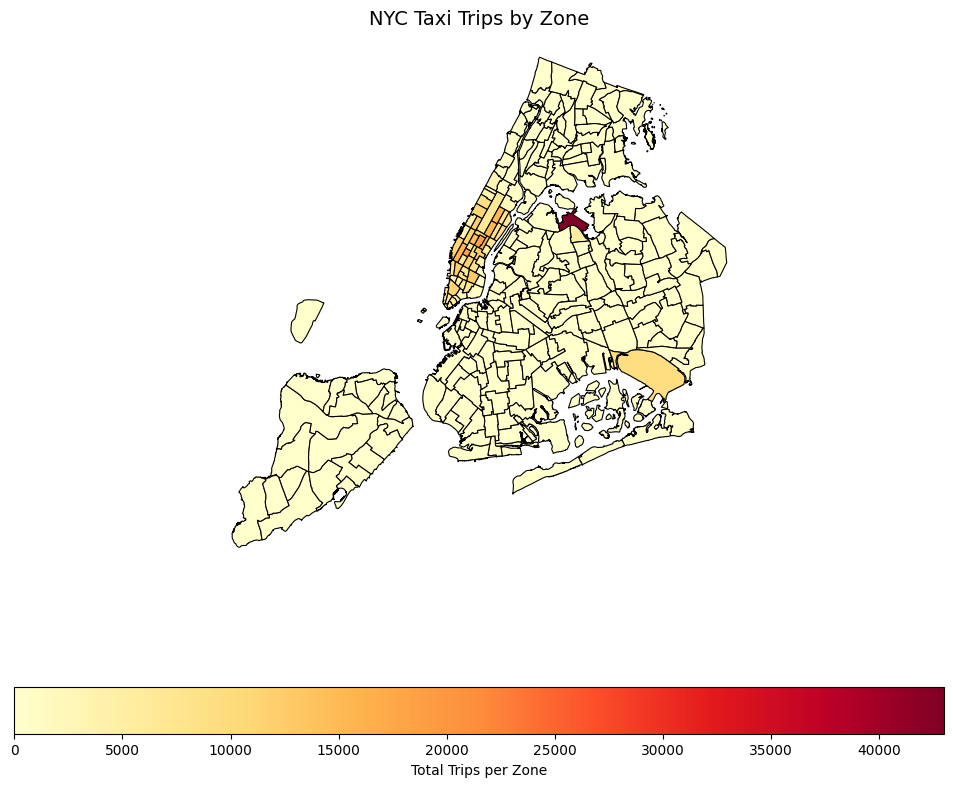

In [ ]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it

# Plot the zones with trip count data
zones.plot(column='total_trips',       # Column for color mapping
           cmap='YlOrRd',              # Color scheme (Yellow-Orange-Red)
           linewidth=0.8,              # Border thickness
           edgecolor='black',          # Border color
           ax=ax,                      # Plot on our defined axis
           legend=True,                 # Show legend
           legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"}
          )

# Add title
ax.set_title("NYC Taxi Trips by Zone", fontsize=14)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show plot
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='total_trips', ascending=False)

# Display top 10 zones with highest trips
zones_sorted.head(10)



OBJECTID  Shape_Leng  Shape_Area                          zone  \
137       138    0.107467    0.000537             LaGuardia Airport   
160       161    0.035804    0.000072                Midtown Center   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
67         68    0.049337    0.000111                  East Chelsea   
161       162    0.035270    0.000048                  Midtown East   
235       236    0.044252    0.000103         Upper East Side North   
236       237    0.042213    0.000096         Upper East Side South   
229       230    0.031028    0.000056     Times Sq/Theatre District   
78         79    0.042625    0.000108                  East Village   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
67           68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
78           79  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     PULocationID  total_trips  
137         138.0      43028.0  
160         161.0      18743.0  
185         186.0      18296.0  
67           68.0      16046.0  
161         162.0      15438.0  
235         236.0      15257.0  
236         237.0      15134.0  
229         230.0      14235.0  
78           79.0      12906.0  
169         170.0      12501.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
route_speeds = df.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    total_distance=('trip_distance', 'sum'),
    avg_duration=('trip_duration', 'mean')  # Average trip duration per hour
).reset_index()

# Calculate speed (distance/time)
route_speeds['avg_speed'] = route_speeds['total_distance'] / (route_speeds['avg_duration'] / 60)  # Convert duration to hours

# Filter out invalid values (zero or negative duration)
route_speeds = route_speeds[(route_speeds['avg_duration'] > 0) & (route_speeds['total_distance'] > 0)]

# Find the slowest routes per hour
slowest_routes = route_speeds.sort_values(['hour', 'avg_speed']).groupby('hour').first().reset_index()

# Display the slowest routes
print(slowest_routes)



    hour  PULocationID  DOLocationID  total_distance  avg_duration  avg_speed
0      0           164           229        0.002681     20.416667   0.007878
1      1           107           211        0.002681     11.966667   0.013440
2      2           234           144        0.007494     12.766667   0.035219
3      3           163           137        0.002681     12.366667   0.013005
4      4           158           144        0.007494     12.366667   0.036358
5      5           186           249        0.007494     20.200000   0.022259
6      6            68           161        0.002681     15.200000   0.010581
7      7           151            75        0.002681     17.633333   0.009121
8      8           246           230        0.002681     25.033333   0.006425
9      9           113           170        0.002681     24.066667   0.006683
10    10            68           230        0.002681     34.416667   0.004673
11    11            65            87        0.002681     24.0500

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

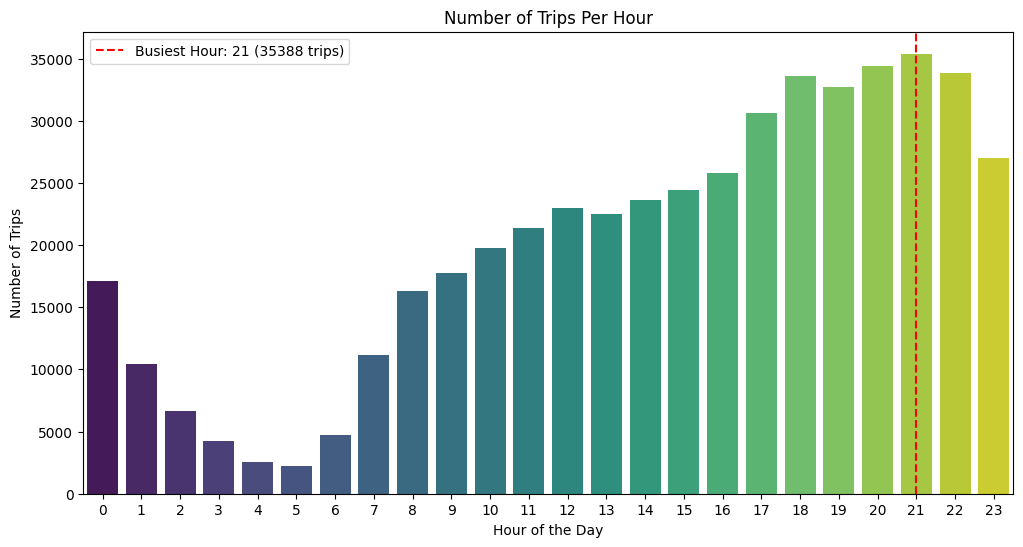

Busiest Hour: 21 with 35388 trips


In [ ]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = df['hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_trips = trips_per_hour.max()

# Plot the hourly distribution
plt.figure(figsize=(12,6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="viridis")

plt.axvline(busiest_hour, color='r', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_trips} trips)')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Hour")
plt.legend()
plt.show()

print(f"Busiest Hour: {busiest_hour} with {busiest_trips} trips")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

# Find the five busiest hours
top_5_hours = trips_per_hour.nlargest(5)

# Scale up the trip counts
scaled_trips = (top_5_hours / sample_fraction).astype(int)

# Display results
print("Actual Number of Trips in the Five Busiest Hours:")
print(scaled_trips)


Actual Number of Trips in the Five Busiest Hours:
hour
21    353880
20    343620
22    338470
18    335690
19    327300
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

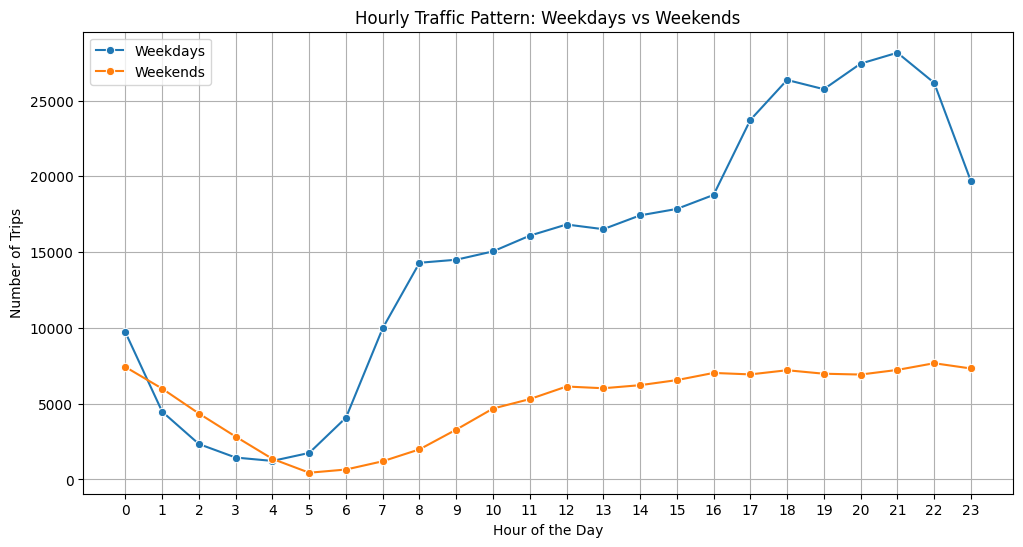

In [ ]:
# Compare traffic trends for the week days and weekends


# Create a weekend column (1 if Sat/Sun, else 0)
df['weekend'] = df['tpep_pickup_datetime'].dt.dayofweek >= 5

# Group by hour and calculate trips separately for weekdays & weekends
weekdays = df[df['weekend'] == 0].groupby('hour').size()
weekends = df[df['weekend'] == 1].groupby('hour').size()

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekdays.index, y=weekdays.values, label="Weekdays", marker='o')
sns.lineplot(x=weekends.index, y=weekends.values, label="Weekends", marker='o')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Pattern: Weekdays vs Weekends")
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

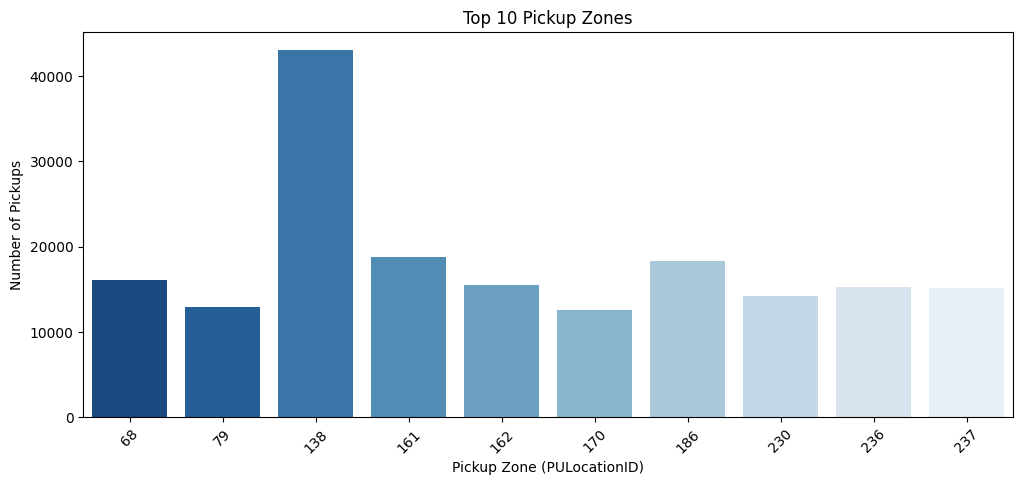

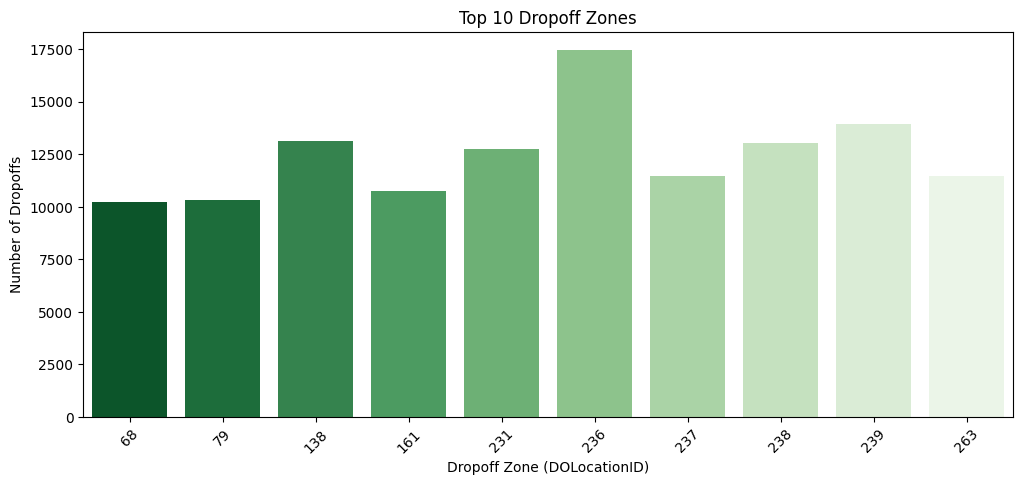

In [ ]:
# Find top 10 pickup and dropoff zones
top_pickup_zones = df['PULocationID'].value_counts().head(10)
top_dropoff_zones = df['DOLocationID'].value_counts().head(10)
# Plot Top 10 Pickup Zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, palette='Blues_r')
plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Pickup Zones")
plt.xticks(rotation=45)
plt.show()

# Plot Top 10 Dropoff Zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, palette='Greens_r')
plt.xlabel("Dropoff Zone (DOLocationID)")
plt.ylabel("Number of Dropoffs")
plt.title("Top 10 Dropoff Zones")
plt.xticks(rotation=45)
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

🔝 Top 10 Zones with Highest Pickup/Dropoff Ratios:
     LocationID  Pickup/Dropoff Ratio
119         132             26.963277
66           70             20.500000
125         138              3.279573
170         186              2.627980
9            11              2.500000
148         162              1.751134
147         161              1.742076
228         249              1.712525
94          100              1.672014
64           68              1.567298

🔻 Bottom 10 Zones with Lowest Pickup/Dropoff Ratios:
     LocationID  Pickup/Dropoff Ratio
74           78                   0.0
20           22                   0.0
21           23                   0.0
187         206                   0.0
122         135                   0.0
24           26                   0.0
134         147                   0.0
136         149                   0.0
137         150                   0.0
151         165                   0.0


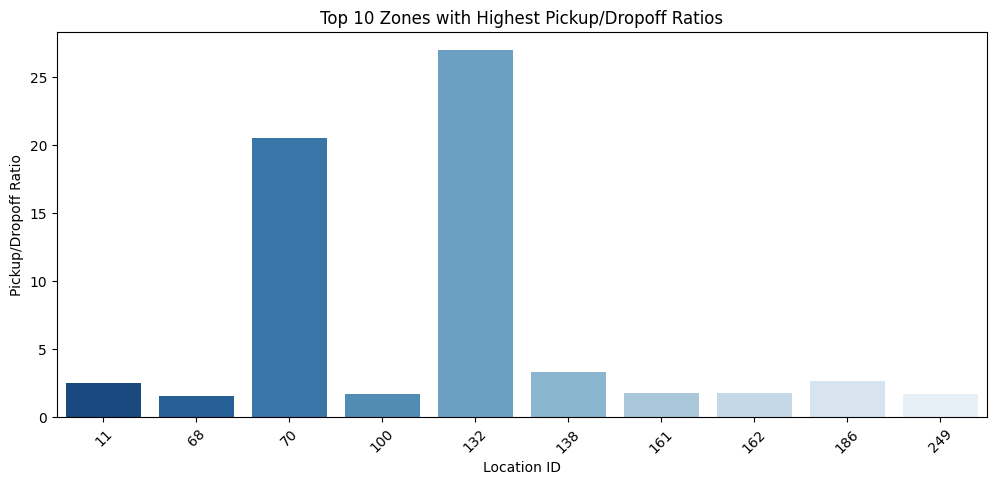

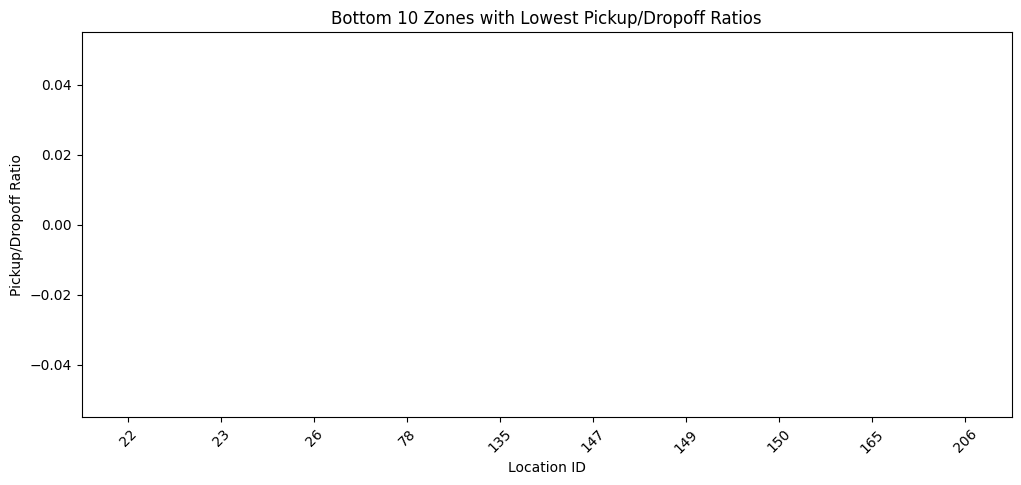

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups and dropoffs per zone
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Create a DataFrame with pickup/dropoff ratios
zone_ratios = (pickup_counts / dropoff_counts).fillna(0).reset_index()
zone_ratios.columns = ['LocationID', 'Pickup/Dropoff Ratio']

# Sort to find top 10 and bottom 10
top_10_ratios = zone_ratios.sort_values(by='Pickup/Dropoff Ratio', ascending=False).head(10)
bottom_10_ratios = zone_ratios.sort_values(by='Pickup/Dropoff Ratio', ascending=True).head(10)

# Display results
print("🔝 Top 10 Zones with Highest Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\n🔻 Bottom 10 Zones with Lowest Pickup/Dropoff Ratios:")
print(bottom_10_ratios)

# Plot the top 10 ratios
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_ratios['LocationID'], y=top_10_ratios['Pickup/Dropoff Ratio'], palette='Blues_r')
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Top 10 Zones with Highest Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.show()

# Plot the bottom 10 ratios
plt.figure(figsize=(12, 5))
sns.barplot(x=bottom_10_ratios['LocationID'], y=bottom_10_ratios['Pickup/Dropoff Ratio'], palette='Reds_r')
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Bottom 10 Zones with Lowest Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.show()



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

🌙 Top 10 Night Pickup Zones:
   LocationID  Pickup Count
0         138          5700
1          79          5042
2         249          4309
3         148          3786
4          48          3227
5         114          2987
6         186          2896
7         230          2493
8          68          2278
9         132          2086

🌙 Top 10 Night Dropoff Zones:
   LocationID  Dropoff Count
0         263           2604
1         239           2025
2         236           2022
3         238           1889
4         141           1883
5         262           1618
6         138           1618
7          48           1551
8          79           1462
9          87           1338


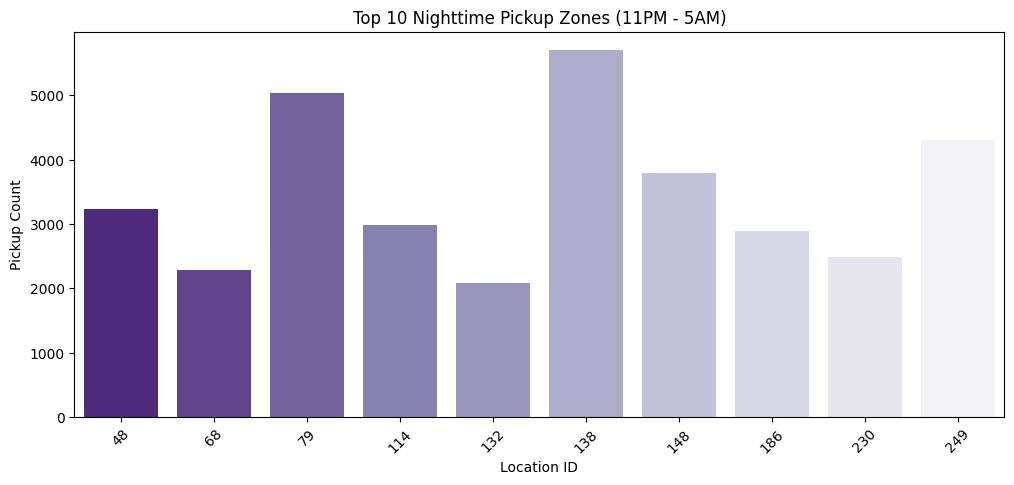

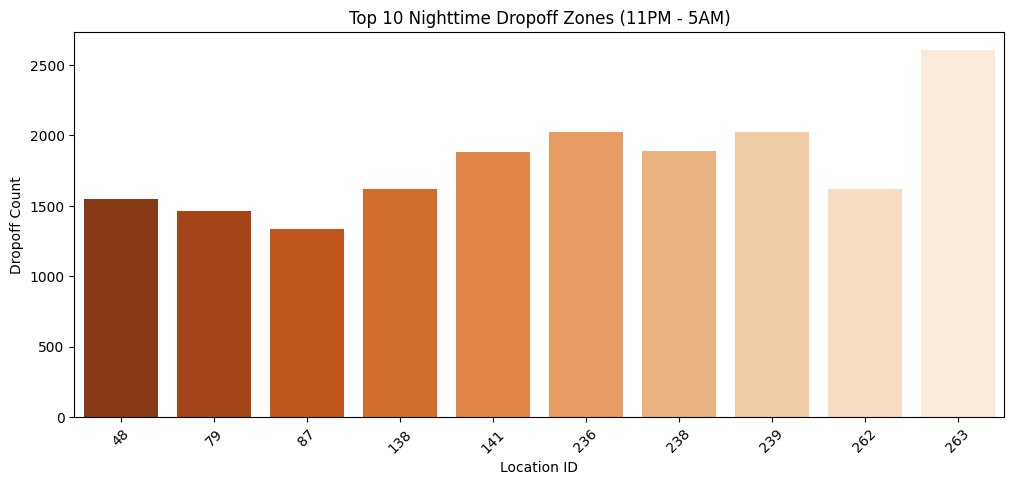

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter trips between 11 PM - 5 AM
night_trips = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Count pickups and dropoffs during night hours
night_pickups = night_trips['PULocationID'].value_counts().head(10)
night_dropoffs = night_trips['DOLocationID'].value_counts().head(10)

# Convert to DataFrame for better visualization
night_pickups_df = night_pickups.reset_index()
night_pickups_df.columns = ['LocationID', 'Pickup Count']

night_dropoffs_df = night_dropoffs.reset_index()
night_dropoffs_df.columns = ['LocationID', 'Dropoff Count']

# Display results
print("🌙 Top 10 Night Pickup Zones:")
print(night_pickups_df)

print("\n🌙 Top 10 Night Dropoff Zones:")
print(night_dropoffs_df)

# Plot top 10 night pickup zones
plt.figure(figsize=(12, 5))
sns.barplot(x=night_pickups_df['LocationID'], y=night_pickups_df['Pickup Count'], palette='Purples_r')
plt.xlabel("Location ID")
plt.ylabel("Pickup Count")
plt.title("Top 10 Nighttime Pickup Zones (11PM - 5AM)")
plt.xticks(rotation=45)
plt.show()

# Plot top 10 night dropoff zones
plt.figure(figsize=(12, 5))
sns.barplot(x=night_dropoffs_df['LocationID'], y=night_dropoffs_df['Dropoff Count'], palette='Oranges_r')
plt.xlabel("Location ID")
plt.ylabel("Dropoff Count")
plt.title("Top 10 Nighttime Dropoff Zones (11PM - 5AM)")
plt.xticks(rotation=45)
plt.show()



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

🌙 Nighttime Revenue: $84,368.41 (13.30%)
☀️ Daytime Revenue: $549,803.58 (86.70%)


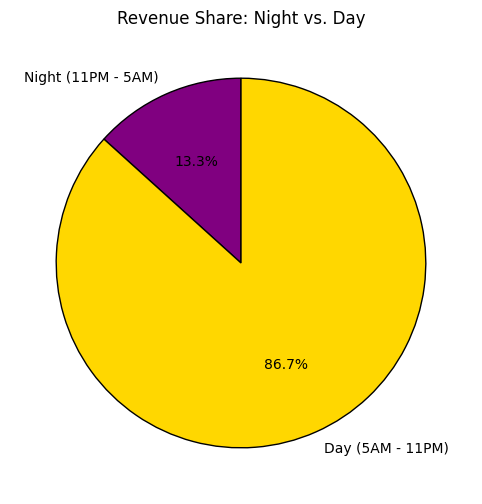

In [ ]:
# Filter for night hours (11 PM to 5 AM)
night_revenue = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]['total_amount'].sum()

# Filter for day hours (5 AM to 11 PM)
day_revenue = df[(df['pickup_hour'] > 5) & (df['pickup_hour'] < 23)]['total_amount'].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

# Revenue share percentage
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Print results
print(f"🌙 Nighttime Revenue: ${night_revenue:,.2f} ({night_share:.2f}%)")
print(f"☀️ Daytime Revenue: ${day_revenue:,.2f} ({day_share:.2f}%)")

# Visualize revenue share with a pie chart
plt.figure(figsize=(8, 6))
plt.pie([night_share, day_share], labels=['Night (11PM - 5AM)', 'Day (5AM - 11PM)'],
        autopct='%1.1f%%', colors=['purple', 'gold'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Revenue Share: Night vs. Day")
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

0.0    5.462737
1.0    4.017074
2.0    1.972525
3.0    3.826618
4.0    3.657312
5.0    1.712220
6.0    1.972265
dtype: float64


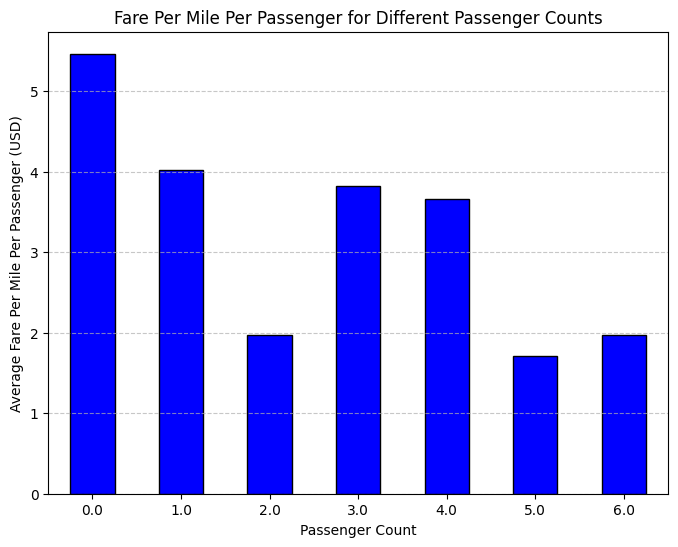

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

df_valid = df[df['trip_distance'] > 0]

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Group by passenger count and calculate average fare per mile
fare_per_mile_per_passenger = df_valid.groupby('passenger_count')['fare_per_mile'].mean() / df_valid['passenger_count']

# Drop cases where passenger_count is 0 or NaN
fare_per_mile_per_passenger = fare_per_mile_per_passenger.dropna()

# Print results
print(fare_per_mile_per_passenger)

# Visualize the data
plt.figure(figsize=(8, 6))
fare_per_mile_per_passenger.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare Per Mile Per Passenger (USD)")
plt.title("Fare Per Mile Per Passenger for Different Passenger Counts")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

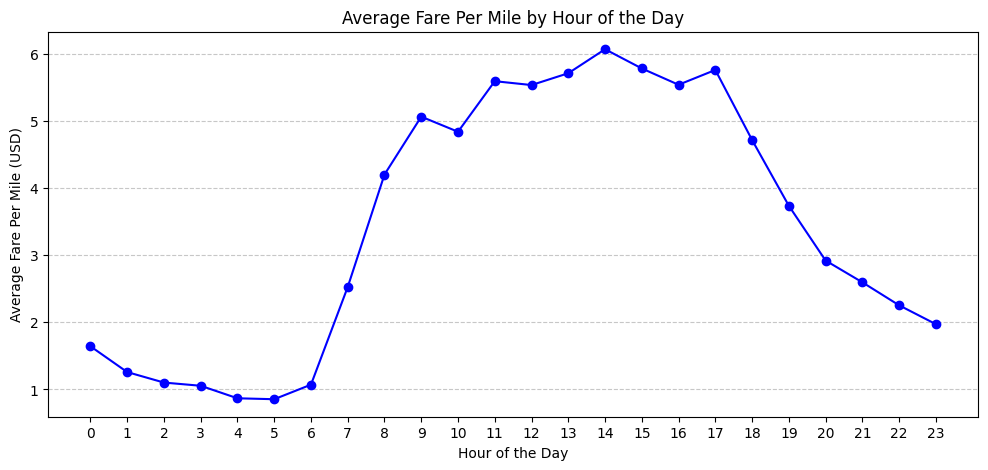

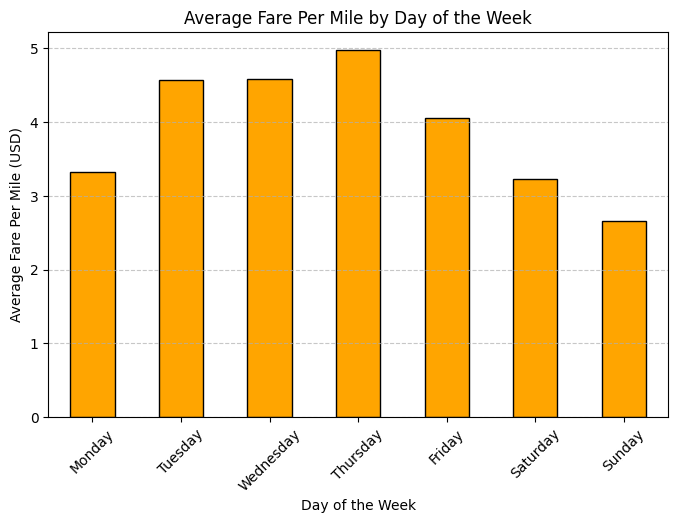

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
df_valid = df[df['trip_distance'] > 0]

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Group by hour of the day
hourly_fare_per_mile = df_valid.groupby('hour')['fare_per_mile'].mean()

# Group by day of the week (assuming 'tpep_pickup_datetime' is a datetime column)
df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.day_name()
daily_fare_per_mile = df_valid.groupby('day_of_week')['fare_per_mile'].mean()

# Reorder days properly
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_fare_per_mile = daily_fare_per_mile.reindex(day_order)

# Visualize Hourly Trend
plt.figure(figsize=(12, 5))
hourly_fare_per_mile.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile (USD)")
plt.title("Average Fare Per Mile by Hour of the Day")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize Daily Trend
plt.figure(figsize=(8, 5))
daily_fare_per_mile.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare Per Mile (USD)")
plt.title("Average Fare Per Mile by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

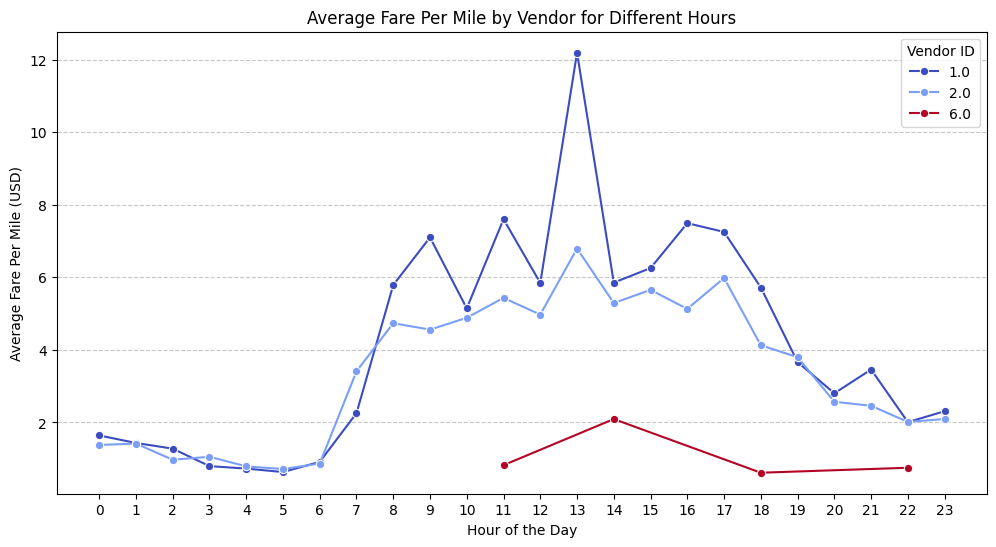

In [ ]:
# Compare fare per mile for different vendors

# File load karke columns dekhte hain
df_sampled = pd.read_parquet("sampled_nyc_taxi_2023.parquet")
df_vendor = df_sampled[['tpep_pickup_datetime', 'VendorID']]
df = df.merge(df_vendor, on='tpep_pickup_datetime', how='left')

df_valid = df[df['trip_distance'] > 0]

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Extract hour from pickup time
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour
# print(df_valid.columns.tolist())
# print(df.columns.tolist())  # Check the original dataset

os.listdir()




#Group by VendorID and hour of the day
vendor_hourly_fare_per_mile = df_valid.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

#Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly_fare_per_mile, x="hour", y="fare_per_mile", hue="VendorID", marker="o", palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile (USD)")
plt.title("Average Fare Per Mile by Vendor for Different Hours")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Vendor ID")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID distance_tier  fare_per_mile
0       1.0     0-2 miles       6.382511
1       1.0     2-5 miles       0.656699
2       1.0      5+ miles       0.415774
3       2.0     0-2 miles       4.843755
4       2.0     2-5 miles       0.656490
5       2.0      5+ miles       0.420870
6       6.0     0-2 miles       1.752887
7       6.0     2-5 miles       0.734148


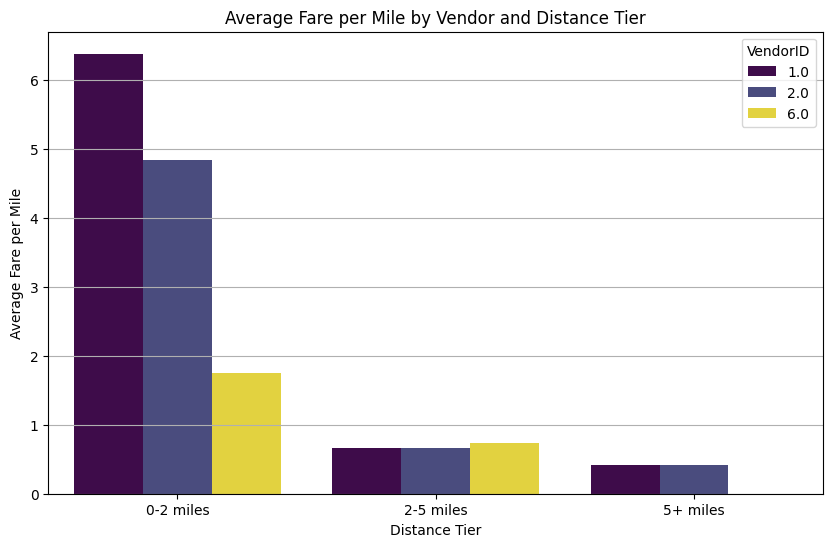

In [ ]:
# Defining distance tiers

conditions = [
    (df['trip_distance'] <= 2),
    (df['trip_distance'] > 2) & (df['trip_distance'] <= 5),
    (df['trip_distance'] > 5)
]

# Assign labels
labels = ['0-2 miles', '2-5 miles', '5+ miles']

# Create a new column for distance tier
df['distance_tier'] = np.select(conditions, labels, default='Unknown')
# Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]  # Remove zero distance trips to avoid errors

# Group by VendorID and Distance Tier
vendor_fare_tiers = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Display results
print(vendor_fare_tiers)
plt.figure(figsize=(10, 6))
sns.barplot(data=vendor_fare_tiers, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='viridis')

plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile")
plt.legend(title="VendorID")
plt.grid(axis='y')
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

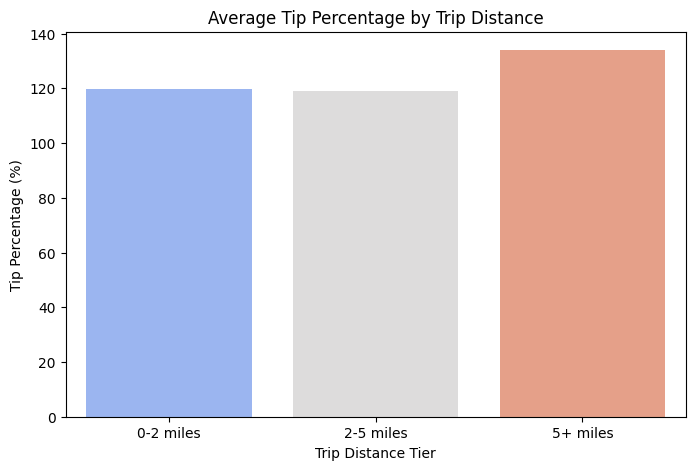

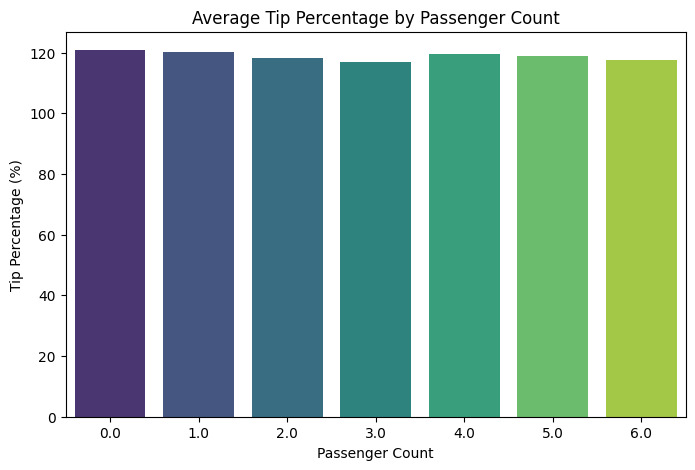

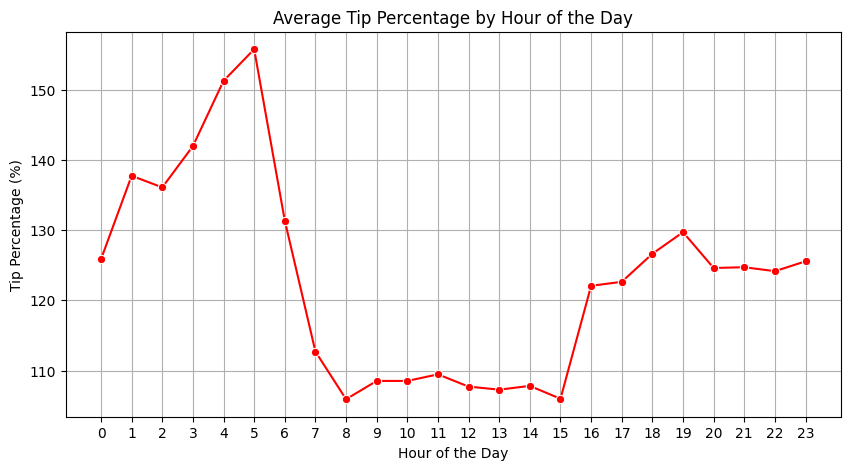

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Avoid division by zero error
df = df[df['fare_amount'] > 0]

# Calculate tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
# Group by distance tier and calculate average tip percentage
tip_by_distance = df.groupby('distance_tier')['tip_percentage'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_distance, x='distance_tier', y='tip_percentage', palette='coolwarm')
plt.title("Average Tip Percentage by Trip Distance")
plt.xlabel("Trip Distance Tier")
plt.ylabel("Tip Percentage (%)")
plt.show()
# Group by passenger count and calculate average tip percentage
tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage', palette='viridis')
plt.title("Average Tip Percentage by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.show()
# Group by hour and calculate average tip percentage
tip_by_hour = df.groupby('hour')['tip_percentage'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(data=tip_by_hour, x='hour', y='tip_percentage', marker='o', color='red')
plt.title("Average Tip Percentage by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Tip Percentage (%)")
plt.xticks(range(0, 24))
plt.grid()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

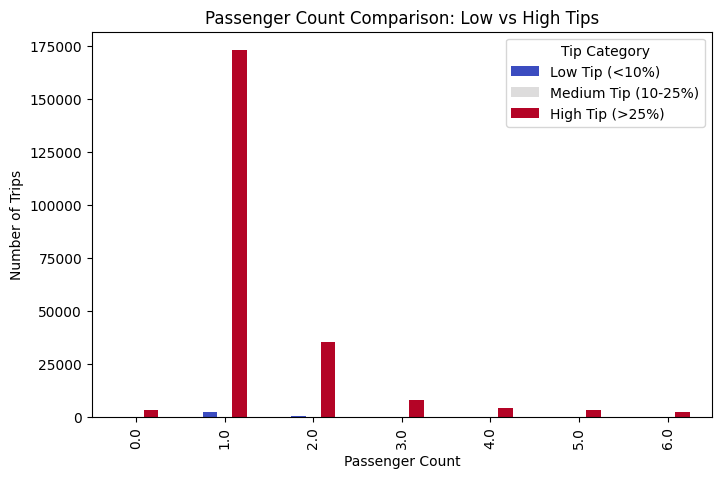

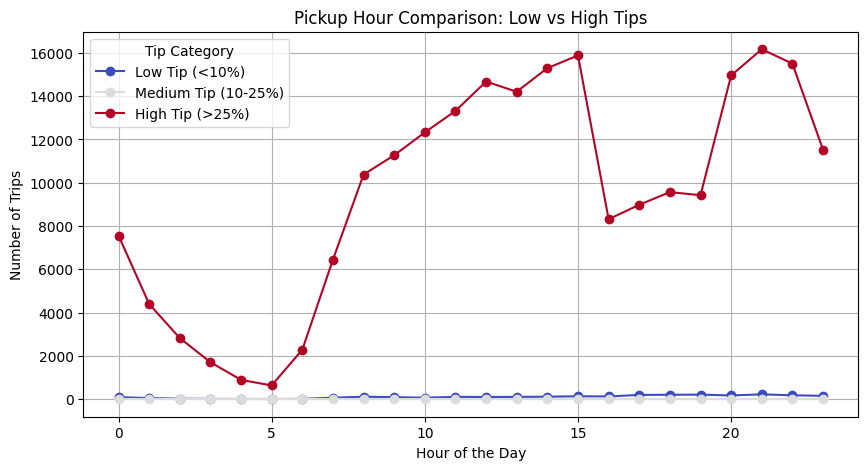

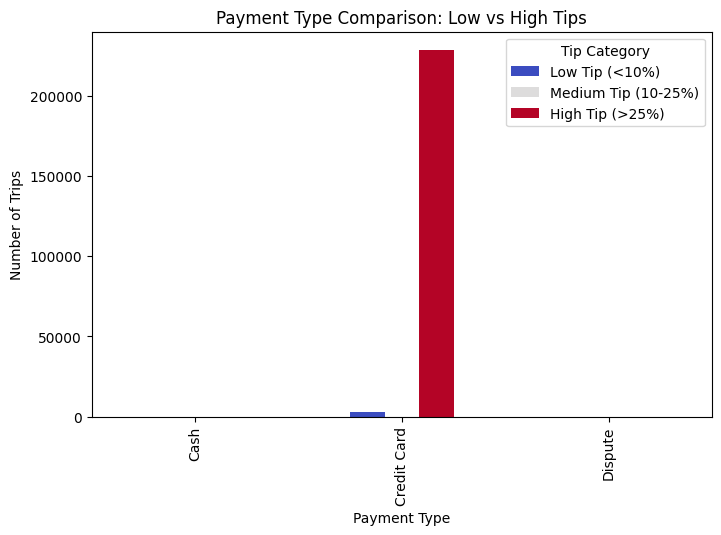

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Define tip categories
df['tip_category'] = pd.cut(df['tip_percentage'], bins=[0, 10, 25, 100],
                            labels=['Low Tip (<10%)', 'Medium Tip (10-25%)', 'High Tip (>25%)'])
# Compare passenger counts for low and high tip cases
passenger_comparison = df[df['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])] \
    .groupby(['tip_category', 'passenger_count'])['passenger_count'].count().unstack()

# Plot
passenger_comparison.T.plot(kind='bar', figsize=(8, 5), colormap='coolwarm')
plt.title("Passenger Count Comparison: Low vs High Tips")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.legend(title="Tip Category")
plt.show()
# Compare pickup hours for low and high tips
hour_comparison = df[df['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])] \
    .groupby(['tip_category', 'hour'])['hour'].count().unstack()

# Plot
hour_comparison.T.plot(kind='line', figsize=(10, 5), marker='o', colormap='coolwarm')
plt.title("Pickup Hour Comparison: Low vs High Tips")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.legend(title="Tip Category")
plt.grid()
plt.show()
# Compare payment types for low and high tips
payment_comparison = df[df['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])] \
    .groupby(['tip_category', 'payment_type'])['payment_type'].count().unstack()

# Plot
payment_comparison.T.plot(kind='bar', figsize=(8, 5), colormap='coolwarm')
plt.title("Payment Type Comparison: Low vs High Tips")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.legend(title="Tip Category")
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

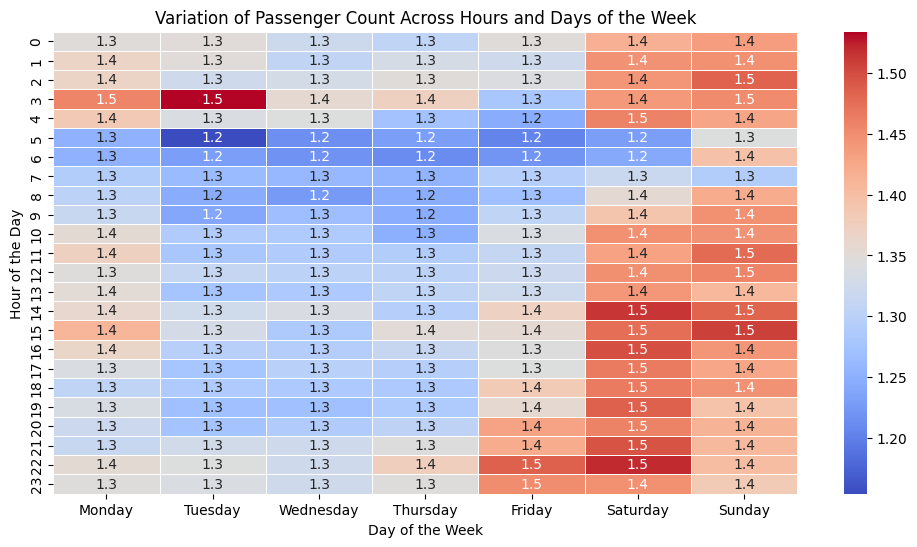

In [ ]:
# See how passenger count varies across hours and days

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=day_order, ordered=True)

# Group by hour and pickup_day to get the average passenger count
passenger_trend = df.groupby(['hour', 'pickup_day'])['passenger_count'].mean().reset_index()

# Pivot for heatmap structure
passenger_pivot = passenger_trend.pivot(index='hour', columns='pickup_day', values='passenger_count')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_pivot, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Variation of Passenger Count Across Hours and Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

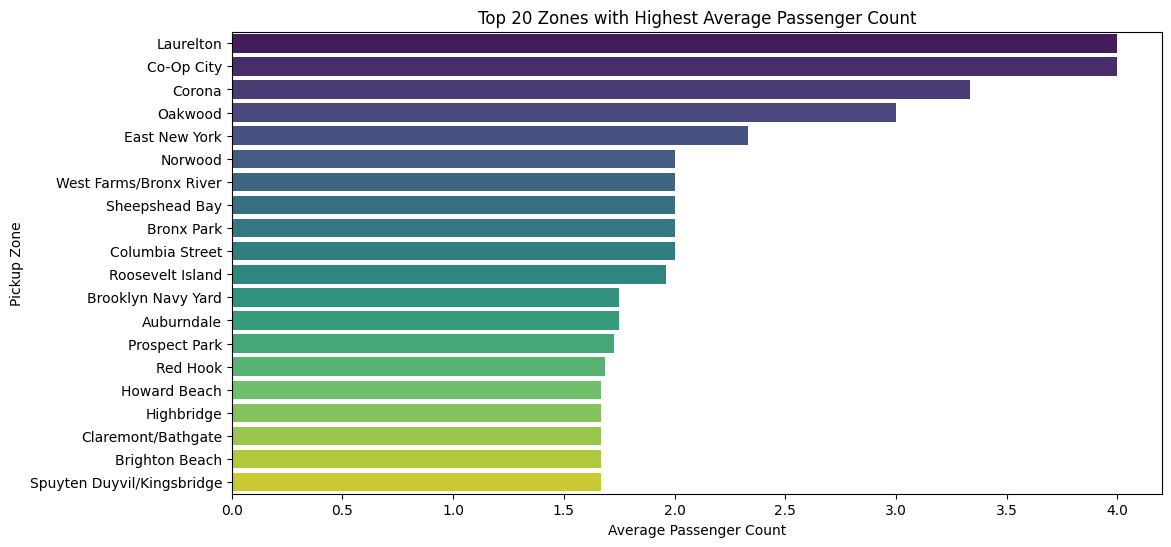

In [ ]:
# How does passenger count vary across zones

zone_passenger_trend = df.groupby('pickup_zone')['passenger_count'].mean().reset_index()

# Sort zones by average passenger count
zone_passenger_trend = zone_passenger_trend.sort_values(by='passenger_count', ascending=False)

# Plot the top 20 zones with the highest passenger count
plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_trend.head(20), x='passenger_count', y='pickup_zone', palette='viridis')

plt.title("Top 20 Zones with Highest Average Passenger Count")
plt.xlabel("Average Passenger Count")
plt.ylabel("Pickup Zone")
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips = zones.copy()
avg_passenger_per_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge this data back into the zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(avg_passenger_per_zone, on='PULocationID', how='left')

# Rename the column for clarity
zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Fill NaN values with 0 (in case some zones have no recorded trips)
zones_with_trips['avg_passenger_count'].fillna(0, inplace=True)

# Display the updated GeoDataFrame
zones_with_trips.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  total_trips  avg_passenger_count  
0           1.0          1.0             1.000000  
1           NaN          0.0             0.000000  
2           NaN          0.0             0.000000  
3           4.0        620.0             1.413249  
4           NaN          0.0             0.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
print(df.columns.tolist())


['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'date', 'hour', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_month_num', 'pickup_year', 'quarter', 'trip_duration', 'pickup_zone', 'pickup_borough', 'weekend', 'VendorID_x', 'VendorID_y', 'VendorID', 'distance_tier', 'fare_per_mile', 'tip_percentage', 'tip_category', 'is_weekend']


['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'date', 'hour', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_month_num', 'pickup_year', 'quarter', 'trip_duration', 'pickup_zone', 'pickup_borough', 'weekend', 'VendorID_x', 'VendorID_y', 'VendorID', 'distance_tier', 'fare_per_mile', 'tip_percentage', 'tip_category', 'is_weekend']
Surcharge Application Frequency:
extra                   360250
mta_tax                 507764
congestion_surcharge    475564
dtype: int64

Top 10 Pickup Zones with Extra Charges Applied:
PULocationID
138    45351
161    14238
186    12490
68     11702
162    11375
79     11160
230    10782
249    10490
237    10323
234     9307
dtype: int64


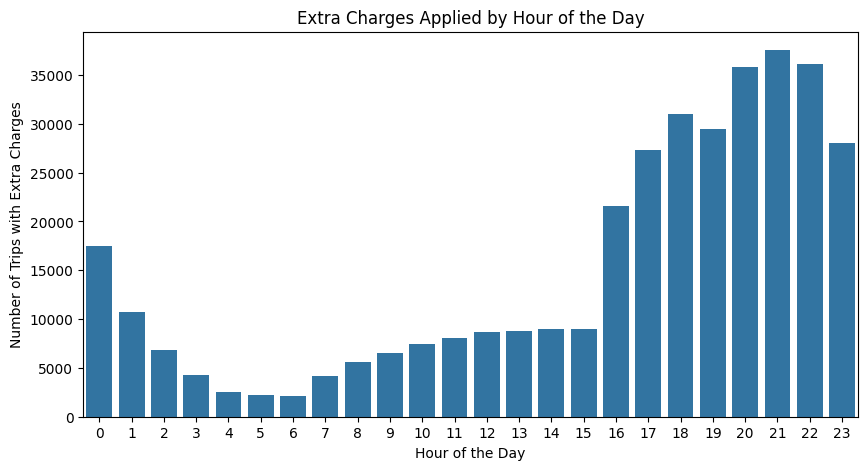

In [ ]:
# How often is each surcharge applied?
# Count occurrences of extra charges across different zones and times
surcharge_analysis = df.groupby(['PULocationID', 'DOLocationID', 'hour'])[['extra', 'mta_tax', 'congestion_surcharge']].sum().reset_index()
print(df.columns.tolist())

# Calculate how often each surcharge is applied
surcharge_counts = (df[['extra', 'mta_tax', 'congestion_surcharge']] > 0).sum()

# Display results
print("Surcharge Application Frequency:")
print(surcharge_counts)

# Find top pickup/dropoff zones where extra charges are applied
top_surcharge_zones = df[df['extra'] > 0].groupby('PULocationID').size().sort_values(ascending=False).head(10)

print("\nTop 10 Pickup Zones with Extra Charges Applied:")
print(top_surcharge_zones)

# Find peak hours when extra charges are more frequently applied
surcharge_by_hour = df[df['extra'] > 0].groupby('hour').size()

# Plot surcharge application by hour
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=surcharge_by_hour.index, y=surcharge_by_hour.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips with Extra Charges")
plt.title("Extra Charges Applied by Hour of the Day")
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

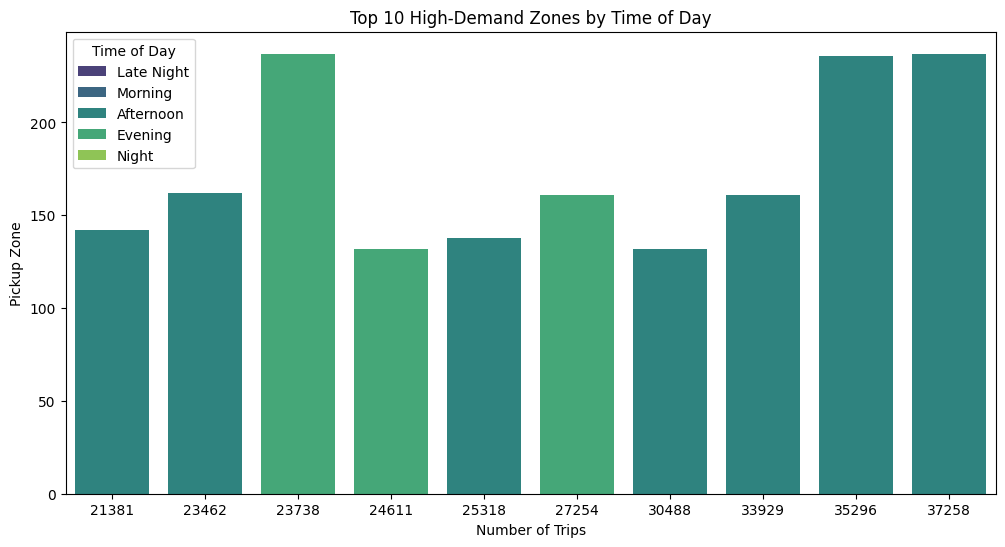

PULocationID time_of_day  trip_count  trip_duration
1147           237   Afternoon       37258      12.937921
1142           236   Afternoon       35296      12.769696
772            161   Afternoon       33929      16.127366
627            132   Afternoon       30488      42.900280
773            161     Evening       27254      16.127366
...            ...         ...         ...            ...
54              11       Night           0      87.517857
410             84  Late Night           0      88.383333
411             84     Morning           0      88.383333
413             84     Evening           0      88.383333
414             84       Night           0      88.383333

[1290 rows x 4 columns]

In [ ]:
# #Demand-Based Dynamic Dispatching
# Use predictive analytics to anticipate demand based on time, location, and external factors like weather and events.
# Peak-hour optimization:

# Morning (6 AM - 10 AM) → Focus on residential to business districts.
# Evening (4 PM - 9 PM) → Position cabs in commercial zones and transit hubs.
# Late Night (9 PM - 3 AM) → Deploy more cabs near nightlife hotspots.
# Live reallocation of cabs to high-demand areas in real time based on ride request frequency.

# #Zone-Based Cab Placement Strategy
# 1.Business hubs & transit centers → Ensure more cabs are available during peak office hours.
# 2.Tourist & nightlife zones → Increase fleet allocation during evenings & weekends.
# 3.Residential areas → Moderate cab availability for early morning & late-night requests.
# 4.Airports & train stations → Dedicated fleet placement for predictable inflow of passengers.

# #Route Optimization for Efficiency
# 1.Use real-time traffic data to dynamically suggest the fastest routes to drivers.
# 2.Identify congested routes during rush hours and suggest alternate paths.
# 3.Implement shared ride options for passengers traveling along similar routes to maximize vehicle utilization.

# #Reduce Empty Rides & Improve Driver Allocation
# 1.Avoid sending taxis to low-demand areas without a confirmed booking.
# 2.Encourage short-distance pickups in high-density zones to reduce waiting time.
# 3.Implement heatmaps & AI-powered demand forecasting for better driver positioning.

# #Incentivize Drivers to Align with Demand Trends
# 1.as_integer_ratioOffer higher commission rates for peak-hour rides in high-demand zones.
# 2.Provide bonuses for picking up from low-traffic areas to maintain balance.
# 3.Use gamification & leaderboard-based incentives to keep drivers engaged in meeting demand.


df = pd.read_parquet("sampled_nyc_taxi_2023.parquet")

# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract hour and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# Identify peak hours (Morning, Evening, Night)
df['time_of_day'] = pd.cut(df['pickup_hour'],
                           bins=[0, 5, 10, 16, 20, 24],
                           labels=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night'],
                           include_lowest=True)

# Group by pickup zones and time of day to find demand patterns
high_demand_zones = df.groupby(['PULocationID', 'time_of_day'])['VendorID'].count().reset_index()
high_demand_zones.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# Identify zones with highest delays (long trip durations)
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
long_trips = df.groupby(['PULocationID'])['trip_duration'].mean().reset_index()
long_trips = long_trips.sort_values(by='trip_duration', ascending=False)

# Merge high-demand and delay zones for optimization
optimized_routing = high_demand_zones.merge(long_trips, on='PULocationID', how='left')

# Plot High-Demand Zones
plt.figure(figsize=(12, 6))
sns.barplot(data=high_demand_zones.sort_values(by='trip_count', ascending=False)[:10],
            x='trip_count', y='PULocationID', hue='time_of_day', palette='viridis')
plt.title("Top 10 High-Demand Zones by Time of Day")
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Zone")
plt.legend(title="Time of Day")
plt.show()

# Output top zones requiring optimization
optimized_routing.sort_values(by=['trip_count', 'trip_duration'], ascending=[False, True])


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.